In [ ]:
import pandas as pd 

In [80]:
dataset=pd.read_csv("C://Users//ALWAYSRAMESH//Downloads//application_data.csv")

In [81]:
dataset.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [82]:
dataset.isnull().sum()

SK_ID_CURR                       0
TARGET                           0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     6734
AMT_REQ_CREDIT_BUREAU_WEEK    6734
AMT_REQ_CREDIT_BUREAU_MON     6734
AMT_REQ_CREDIT_BUREAU_QRT     6734
AMT_REQ_CREDIT_BUREAU_YEAR    6734
Length: 122, dtype: int64

In [83]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49999 entries, 0 to 49998
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(64), int64(42), object(16)
memory usage: 46.5+ MB


In [84]:
dataset.dropna(inplace=True)

In [85]:
dataset.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
71,100083,0,Cash loans,M,Y,Y,0,103500.0,573628.5,24435.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
124,100145,0,Cash loans,F,Y,Y,1,202500.0,260725.5,16789.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0


In [86]:
x=dataset[['AMT_INCOME_TOTAL',	'AMT_CREDIT',	'AMT_ANNUITY','AMT_GOODS_PRICE','AMT_REQ_CREDIT_BUREAU_YEAR']]
y=dataset['TARGET']

In [87]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [88]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression() 
lr.fit(x_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [89]:
y_pred=lr.predict(x_test)

In [90]:
from sklearn.metrics import accuracy_score, classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       394
           1       0.00      0.00      0.00        23

    accuracy                           0.94       417
   macro avg       0.47      0.50      0.49       417
weighted avg       0.89      0.94      0.92       417



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [91]:
from sklearn.tree import DecisionTreeClassifier 
dtc=DecisionTreeClassifier(max_leaf_nodes=5,max_depth=3) 
dtc.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=5)

In [92]:
y_pred=dtc.predict(x_test)

In [93]:
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.9448441247002398


In [94]:
from sklearn.metrics import confusion_matrix 
print(confusion_matrix(y_test,y_pred))

[[394   0]
 [ 23   0]]


[Text(0.625, 0.875, 'x[1] <= 1097010.0\ngini = 0.116\nsamples = 971\nvalue = [911, 60]'), Text(0.5, 0.625, 'x[4] <= 3.5\ngini = 0.134\nsamples = 774\nvalue = [718.0, 56.0]'), Text(0.5625, 0.75, 'True  '), Text(0.25, 0.375, 'x[1] <= 1007518.5\ngini = 0.15\nsamples = 660\nvalue = [606, 54]'), Text(0.125, 0.125, 'gini = 0.14\nsamples = 621\nvalue = [574, 47]'), Text(0.375, 0.125, 'gini = 0.295\nsamples = 39\nvalue = [32, 7]'), Text(0.75, 0.375, 'x[0] <= 76500.0\ngini = 0.034\nsamples = 114\nvalue = [112, 2]'), Text(0.625, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'), Text(0.875, 0.125, 'gini = 0.018\nsamples = 113\nvalue = [112, 1]'), Text(0.75, 0.625, 'gini = 0.04\nsamples = 197\nvalue = [193.0, 4.0]'), Text(0.6875, 0.75, '  False')]


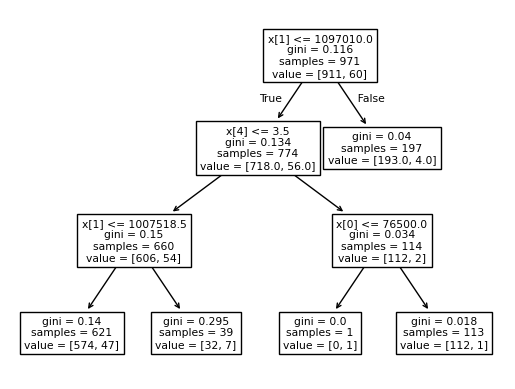

In [95]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt 
import seaborn as sns
print(plot_tree(dtc))
plt.show()

In [96]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier() 
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [97]:
y_pred=rfc.predict(x_test)

In [98]:
accuracy2=accuracy_score(y_test,y_pred)
accuracy2

0.9424460431654677

In [99]:
from sklearn.ensemble import GradientBoostingClassifier 
gbc=GradientBoostingClassifier(n_estimators=200,min_samples_split=2) 
gbc.fit(x_train,y_train)

GradientBoostingClassifier(n_estimators=200)

In [100]:
y_pred=gbc.predict(x_test)

In [101]:
accuracy3=accuracy_score(y_test,y_pred) 
accuracy3

0.9376498800959233

In [102]:
from sklearn.ensemble import AdaBoostClassifier 
abc=AdaBoostClassifier(n_estimators=100, learning_rate=0.01)
abc.fit(x_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(learning_rate=0.01, n_estimators=100)

In [103]:
y_pred=abc.predict(x_test)

In [104]:
accuracy4=accuracy_score(y_test,y_pred)
accuracy4

0.9448441247002398

In [105]:
import xgboost as xgb

model1=xgb.XGBClassifier()
model1.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [106]:
y_pred=model1.predict(x_test)

In [107]:
accuracy5=accuracy_score(y_test,y_pred)
accuracy5

0.9280575539568345

In [108]:
from sklearn.ensemble import RandomForestClassifier
rfc2=RandomForestClassifier()

In [109]:
from sklearn.model_selection import RandomizedSearchCV

In [110]:
forest_params=[{'n_estimators':[50,75,100],'max_depth':list(range(10,15)),'max_features':list(['sqrt','log2'])}]

In [111]:
model2=RandomizedSearchCV(estimator=rfc2, param_distributions=forest_params, cv=5, scoring='accuracy')
model2.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions=[{'max_depth': [10, 11, 12, 13, 14],
                                         'max_features': ['sqrt', 'log2'],
                                         'n_estimators': [50, 75, 100]}],
                   scoring='accuracy')

In [112]:
model2.fit(x_train, y_train)
print(model2.best_params_)
print(model2.best_score_)

{'n_estimators': 100, 'max_features': 'log2', 'max_depth': 10}
0.9382077716098335


In [113]:
y_pred=model2.predict(x_test)

In [114]:
accuracy6=accuracy_score(y_test,y_pred)
accuracy6

0.9448441247002398

In [115]:
y_pred=dtc.predict(x_test) 
print("DecisionTreeRegressor: ",accuracy)
y_pred=rfc.predict(x_test) 
print("RandomForestClassifier: ",accuracy2)
y_pred=gbc.predict(x_test) 
print("GradientBoostingClass: ",accuracy3)
y_pred=abc.predict(x_test) 
print("AdaboostClassifier: ",accuracy4)
y_pred=model1.predict(x_test) 
print("XGBClassifier: ",accuracy5)
y_pred=model2.predict(x_test) 
print("RandomizedSearchCV: ",accuracy6)

DecisionTreeRegressor:  0.9448441247002398
RandomForestClassifier:  0.9424460431654677
GradientBoostingClass:  0.9376498800959233
AdaboostClassifier:  0.9448441247002398
XGBClassifier:  0.9280575539568345
RandomizedSearchCV:  0.9448441247002398
